# <span style="text-decoration: underline">Hyperparameter optimization Single layer neural network and Compersion between Neural Network Vs Linear Regression Vs Quadratic Regression

# Import Library 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import mean_squared_error,r2_score
import torch
import torch.nn as nn
import torch.optim as optim

# Load the data set

In [8]:
df = pd.read_csv('Concrete_Data.csv')
# Normalize the dataset
df_norm = (df - df.mean()) / df.std()

# Split the dataset into training and testing sets
train_df = df_norm.sample(frac=0.7, random_state=0)
test_df = df_norm.drop(train_df.index)

# Convert the datasets to numpy arrays
train_data = train_df.values
test_data = test_df.values

# Extract the input and output variables from the training and testing sets
train_X = train_data[:, :-1]
train_y = train_data[:, -1].reshape(-1, 1)
test_X = test_data[:, :-1]
test_y = test_data[:, -1].reshape(-1, 1)

# Neural Network Class from Scratch

In [3]:
class NeuralNetwork_py:
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.weights1 = np.random.randn(input_dim, hidden_dim)
        self.bias1 = np.zeros((1, hidden_dim))
        self.weights2 = np.random.randn(hidden_dim, output_dim)
        self.bias2 = np.zeros((1, output_dim))
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward(self, X):
        self.hidden_layer = self.sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output_layer = np.dot(self.hidden_layer, self.weights2) + self.bias2
        #error = y - self.output_layer
        return self.output_layer
    
    def backward(self, X, y, learning_rate):
        d_output_layer = y - self.output_layer
        d_weights2 = np.dot(self.hidden_layer.T, d_output_layer)
        d_bias2 = np.sum(d_output_layer, axis=0, keepdims=True)
        d_hidden_layer = np.dot(d_output_layer, self.weights2.T) * self.sigmoid_derivative(self.hidden_layer)
        d_weights1 = np.dot(X.T, d_hidden_layer)
        d_bias1 = np.sum(d_hidden_layer, axis=0, keepdims=True)
        
        self.weights1 += learning_rate * d_weights1
        self.bias1 += learning_rate * d_bias1
        self.weights2 += learning_rate * d_weights2
        self.bias2 += learning_rate * d_bias2
    
    def train(self, X, y, num_epochs, learning_rate):
        for epoch in range(num_epochs):
            for i in range(len(X)):
                xi = X[i].reshape(1, -1)
                yi = y[i].reshape(1, -1)
                output = self.forward(xi)
                self.backward(xi, yi, learning_rate)
            error = y - self.output_layer
            if epoch%100==0:
                print('error after',epoch,'iteration : \t',np.average(error))
            
    
    def predict(self, X):
        return self.forward(X)

In [5]:
train_df_hy = df_norm.sample(frac=0.6, random_state=0)
temp_df = df_norm.drop(train_df.index)
val_df_hy = temp_df.sample(frac=0.5, random_state=0)
test_df_hy = temp_df.drop(val_df_hy.index)

###########################
train_data_hy = train_df_hy.values
val_data_hy = val_df_hy.values
test_data_hy = test_df_hy.values

train_X_hy = train_data_hy[:, :-1]
train_y_hy = train_data_hy[:, -1].reshape(-1, 1)
test_X_hy = test_data_hy[:, :-1]
test_y_hy = test_data_hy[:, -1].reshape(-1, 1)
val_X_hy = val_data_hy[:, :-1]
val_y_hy = val_data_hy[:, -1].reshape(-1, 1)

# Hyperparameter optimization Single layer neural network

error after 0 iteration : 	 -1.4078039487148293
error after 100 iteration : 	 -0.6229359701484484
error after 200 iteration : 	 -0.6222059270865736
error after 300 iteration : 	 -0.6214241735748557
error after 400 iteration : 	 -0.621289024646915
error after 500 iteration : 	 -0.6212685254947107
error after 600 iteration : 	 -0.6212654878953311
error after 700 iteration : 	 -0.6212650409128756
error after 800 iteration : 	 -0.6212649753660651
error after 900 iteration : 	 -0.6212649657746695
Hidden Layer Size: 2, Mean Squared Error: 0.22807516875558742
error after 0 iteration : 	 -0.5538649196010744
error after 100 iteration : 	 -0.6362693575206089
error after 200 iteration : 	 -0.5998022272984567
error after 300 iteration : 	 -0.5870396326920242
error after 400 iteration : 	 -0.5786029761000151
error after 500 iteration : 	 -0.5768710964107507
error after 600 iteration : 	 -0.5794754752612058
error after 700 iteration : 	 -0.585307718994815
error after 800 iteration : 	 -0.59083566777

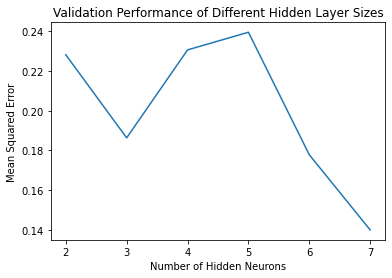

In [6]:
# Train and evaluate the models with different numbers of hidden neurons
hidden_layer_sizes = [2, 3, 4, 5, 6, 7]
input_dim = 8
output_dim = 1
mse_values = []
best_mse = float('inf')
best_model = None

for size in hidden_layer_sizes:
    model = NeuralNetwork_py(input_dim=input_dim, hidden_dim=size, output_dim=output_dim)
    model.train(train_X_hy, train_y_hy, num_epochs=1000, learning_rate=0.1)
    
    # Make predictions on the validation set and compute the mean squared error
    predictions = model.predict(val_X_hy)
    mse = np.mean((predictions - val_y_hy) ** 2)
    mse_values.append(mse)
    
    # Check if this model is the best so far
    if mse < best_mse:
        best_mse = mse
        best_model = model
        best_size = size

    print(f'Hidden Layer Size: {size}, Mean Squared Error: {mse}')

print(f'\nThe best model has {best_size} neurons in the hidden layer with a MSE of {best_mse}')

# Make predictions on the test set using the best model and compute the mean squared error
predictions = best_model.predict(test_X_hy)
mse = np.mean((predictions - test_y_hy) ** 2)
print('Mean Squared Error (Test Set):', mse)

# Plot the MSE values for each model
plt.plot(hidden_layer_sizes, mse_values)
plt.xlabel('Number of Hidden Neurons')
plt.ylabel('Mean Squared Error')
plt.title('Validation Performance of Different Hidden Layer Sizes')
plt.show()


**The best model has 7 neurons in the hidden layer with a MSE of 0.14009698607922946**

# Optimal neural network compare with linear and quadratic regression

## <span style='color:orange'>  Linear Regression 

In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
#ridgeModelChosen = Ridge(alpha = 3)
model = LinearRegression()
model.fit(train_X,train_y)
#ridgeModelChosen.fit(train_X, train_y)

LinearRegression()

## <span style='color:purple'> Quadratic regression

In [11]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(train_X)
from sklearn.linear_model import LinearRegression
poly.fit(X_poly, train_y)
lin2 = LinearRegression()
lin2.fit(X_poly, train_y)

LinearRegression()

## _Compersion between <span style='color:red'> Neural Network  </span> Vs <span style='color:green'> Linear Regression  </span> Vs <span style='color:blue'> Quadratic Regression  </span>_

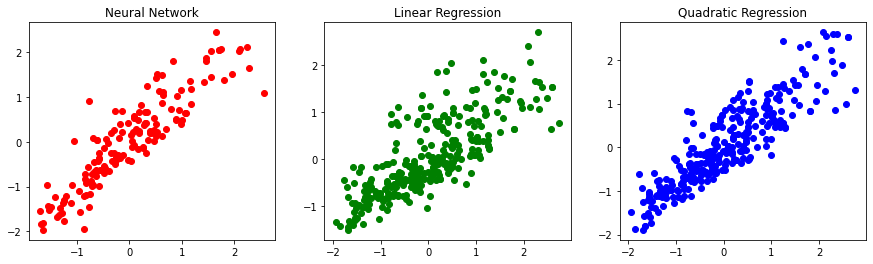

In [12]:
fig,a =  plt.subplots(nrows=1,ncols=3,figsize=(15,4))
x = np.arange(1,5)
a[0].scatter(test_y_hy,predictions,color='red')
a[0].set_title('Neural Network')
a[1].scatter(test_y,model.predict(test_X),color='g')
a[1].set_title('Linear Regression')
a[2].scatter(test_y,lin2.predict(poly.fit_transform(test_X)),color='blue')
a[2].set_title('Quadratic Regression')
plt.show()

# Error Calculation

In [13]:
print('MSE for test data  Using Neural Network:', mse)
print('MSE for test data  Using linear regression :',mean_squared_error(test_y,model.predict(test_X)))
print('MSE for test data using quadratic model : ', mean_squared_error(test_y,lin2.predict(poly.fit_transform(test_X)))) 

MSE for test data  Using Neural Network: 0.18570315553563382
MSE for test data  Using linear regression : 0.4006947906240477
MSE for test data using quadratic model :  0.21781732080120578


In [17]:
print('r2_score for test data  Using Neural Network:', r2_score(test_y_hy,predictions))
print('r2_score for test data  Using linear regression :',r2_score(test_y,model.predict(test_X)))
print('r2_score for test data using quadratic model : ', r2_score(test_y,lin2.predict(poly.fit_transform(test_X))))

r2_score for test data  Using Neural Network: 0.789480737698012
r2_score for test data  Using linear regression : 0.6094407176202787
r2_score for test data using quadratic model :  0.7876923321875426
